# **Back Propagation**
**2347247 
Priya Dharshini G**

Step 1: Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


Step 2: Load MNIST Data

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)


Step 3: Build the Neural Network Model

In [3]:
# Define the model
model = models.Sequential()

# Input layer (784 neurons) and hidden layer (128 neurons with ReLU activation)
model.add(layers.Dense(128, input_shape=(784,), activation='relu'))

# Output layer (10 neurons with softmax activation)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss and an optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\monaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 4: Train the Model

In [4]:
# Train the model for 10 epochs
history = model.fit(x_train_flat, y_train_onehot, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8647 - loss: 0.4778 - val_accuracy: 0.9550 - val_loss: 0.1585
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9607 - loss: 0.1382 - val_accuracy: 0.9667 - val_loss: 0.1182
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9727 - loss: 0.0917 - val_accuracy: 0.9698 - val_loss: 0.1003
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9818 - loss: 0.0615 - val_accuracy: 0.9718 - val_loss: 0.0938
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.9863 - loss: 0.0456 - val_accuracy: 0.9736 - val_loss: 0.0875
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9898 - loss: 0.0361 - val_accuracy: 0.9720 - val_loss: 0.0957
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9918 - loss: 0.0292 - val_accuracy: 0.9750 - val_loss: 0.0871
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9935 - loss: 0

Step 5: Analyze the Gradient Flow (Backpropagation)

5.1. Compute Gradients Manually



In [5]:
# Create a TensorFlow GradientTape context for manual gradient computation
with tf.GradientTape() as tape:
    # Forward pass: Get the predictions
    predictions = model(x_train_flat[:1])  # Test with a small batch (e.g., 1 sample)

    # Compute the loss
    loss = tf.keras.losses.categorical_crossentropy(y_train_onehot[:1], predictions)

# Backward pass: Compute the gradients of the loss with respect to model weights
gradients = tape.gradient(loss, model.trainable_variables)

# Print the gradients to analyze
for i, grad in enumerate(gradients):
    print(f"Gradient for layer {i+1}: {grad.numpy()}")


Gradient for layer 1: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Gradient for layer 2: [-1.15332834e-04 -3.15247074e-04 -2.41212620e-04 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -8.06884491e-04 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  2.37208849e-04  6.74781695e-05 -4.11677727e-04
  3.31672956e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -2.52020749e-04  1.80198345e-04
 -0.00000000e+00  2.47642223e-04  0.00000000e+00  2.38791443e-04
 -2.49274490e-05 -3.39074722e-05  1.12926064e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.21772267e-04  0.00000000e+00
 -1.87992438e-04  3.49291891e-04 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.14219971e-06 -0.00000000e+00  3.26463167e-04
  0.00000000e+00  0.

5.2. Check for Vanishing/Exploding Gradients


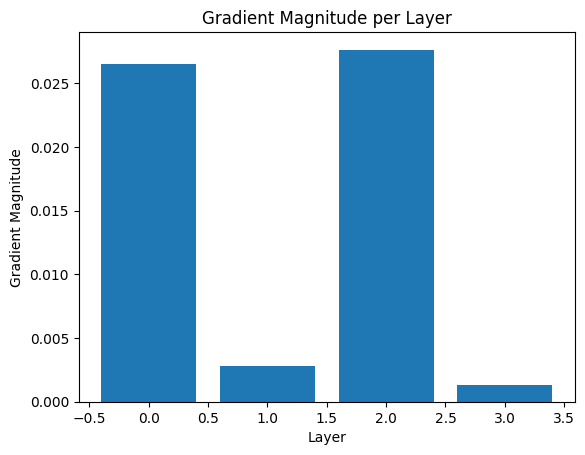

In [6]:
# Plot the gradient magnitudes for each layer
grad_magnitudes = [np.linalg.norm(grad.numpy()) for grad in gradients]

plt.bar(range(len(grad_magnitudes)), grad_magnitudes)
plt.xlabel('Layer')
plt.ylabel('Gradient Magnitude')
plt.title('Gradient Magnitude per Layer')
plt.show()


Step 6: Modify the Model to Fix the Issue


In [7]:
# Modify the model with LeakyReLU and BatchNormalization
model = models.Sequential()

model.add(layers.Dense(128, input_shape=(784,)))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Retrain the model
history = model.fit(x_train_flat, y_train_onehot, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8643 - loss: 0.4497 - val_accuracy: 0.9352 - val_loss: 0.2109
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9409 - loss: 0.1978 - val_accuracy: 0.9550 - val_loss: 0.1620
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9544 - loss: 0.1571 - val_accuracy: 0.9621 - val_loss: 0.1328
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9628 - loss: 0.1279 - val_accuracy: 0.9625 - val_loss: 0.1233
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9678 - loss: 0.1079 - val_accuracy: 0.9598 - val_loss: 0.1311
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9727 - loss: 0.0926 - val_accuracy: 0.9638 - val_loss: 0.1195
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9747 - loss: 0.0816 - val_accuracy: 0.9659 - val_loss: 0.1141
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9785 - loss: 0.07

Step 7: Observe Training and Loss Curves


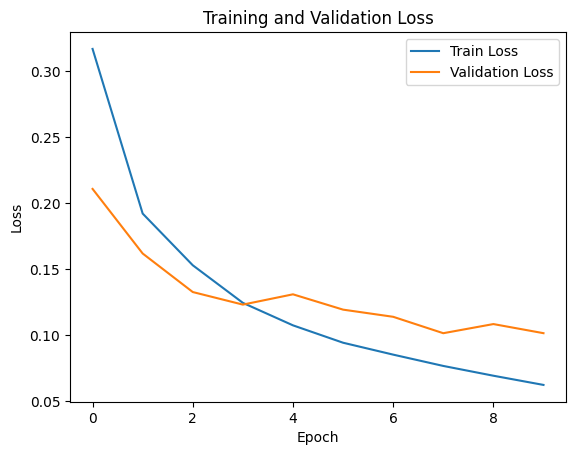

In [8]:
# Plot training & validation accuracy and loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


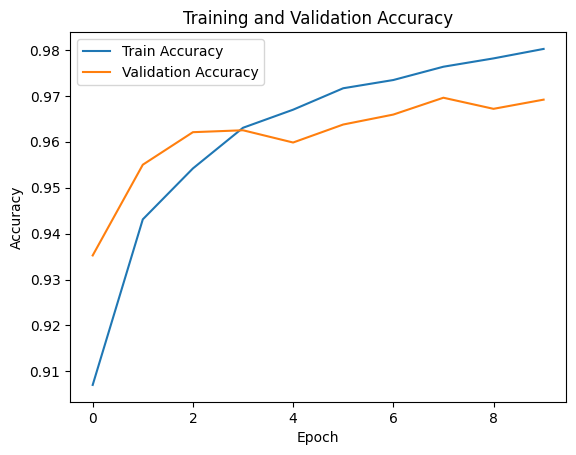

In [9]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
